# google landmark prediction using tensorflow_hub

mauzum shamil

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
from PIL import Image
from tensorflow.keras import layers

# Define the TensorFlow Hub model URL and label map path
TF_MODEL_URL = 'https://tfhub.dev/google/on_device_vision/classifier/landmarks_classifier_asia_V1/1'
LABEL_MAP_PATH = r"C:\Users\dell\Desktop\landmarks_classifier_asia_V1_label_map.csv"
IMAGE_SHAPE = (321, 321)

# Load the label map
df = pd.read_csv(LABEL_MAP_PATH)
label_map = dict(zip(df.id, df.name))
class_names = list(label_map.values())


In [38]:
label_map

{0: 'Bagha Shahi Mosque',
 1: 'City Palace',
 2: 'The Immaculate Conception Cathedral of Cubao',
 3: 'City of David',
 4: 'Noor Mahal',
 5: 'City of David',
 6: 'Shree Muktinath Temple, Nepal',
 7: 'Shivpuri Nagarjun National Park',
 8: 'Nankin-machi',
 9: 'Khao Sok National Park',
 10: 'Mt. Goryu',
 11: 'Milk Grotto Church',
 12: 'Gili Trawangan',
 13: 'Htukkant Thein Temple',
 14: 'Yabakei Dam',
 15: 'St. Francis of Assisi Parish Church',
 16: 'Saint Hripsime Church',
 17: 'Ranipuram',
 18: "St. Joseph's Church, Beijing",
 19: 'Tower of David',
 20: 'Sandiaojiao Lighthouse',
 21: 'Ngong Ping 360',
 22: 'Chhatrapati Shivaji Terminus',
 23: 'Sea of Galilee',
 24: 'Khor Virab',
 25: 'Shanti Stupa',
 26: 'Sevanavank',
 27: 'Izmenchivoye',
 28: 'מצפה גדות',
 29: 'Autumn-Admiring Pavilion',
 30: 'Lohagad Fort',
 31: "Humble Administrator's Garden",
 32: 'Tiananmen Square',
 33: 'Sree Thanumalayan Temple',
 34: 'Menara Kuala Lumpur',
 35: 'Lok Virsa Heritage Museum',
 36: 'Batu Caves',
 37:

In [2]:
# Create the embedding layer from TensorFlow Hub
embed = hub.KerasLayer(TF_MODEL_URL, input_shape=IMAGE_SHAPE+(3,), output_key="predictions:logits", trainable=False)


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [3]:
class MyModel(tf.keras.Model):
    def __init__(self, embed):
        super(MyModel, self).__init__()
        self.embedding_layer = embed
        self.dense_layer1 = layers.Dense(256, activation='relu')
        self.dense_layer2 = layers.Dense(128, activation='relu')
        self.dense_layer3 = layers.Dense(64, activation='relu')
        self.output_layer = layers.Dense(13, activation='softmax')

    def call(self, inputs):
        x = self.embedding_layer(inputs)
        x = self.dense_layer1(x)
        x = self.dense_layer2(x)
        x = self.dense_layer3(x)
        return self.output_layer(x)


In [4]:
# Instantiate the custom model with the embedding layer
model = MyModel(embed)

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Example summary to visualize the model architecture
model.build((None,) + IMAGE_SHAPE + (3,))  # Specify input shape
model.summary()


c:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\layer.py:357: UserWarning: `build()` was called on layer 'my_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
img_loc = r"C:\Users\dell\Downloads\mountain goryu.jpg"
img = Image.open(img_loc).resize(IMAGE_SHAPE)
img = np.array(img)/255.0
img = img[np.newaxis, ...]  # Add batch dimension


In [34]:
def classify_image(image, model, label_map):
    img = np.array(image)/255.0
    img = img[np.newaxis, ...]  # Add batch dimension
    prediction = model.predict(img)
    predicted_label =  label_map[np.argmax(prediction)]
    return predicted_label


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


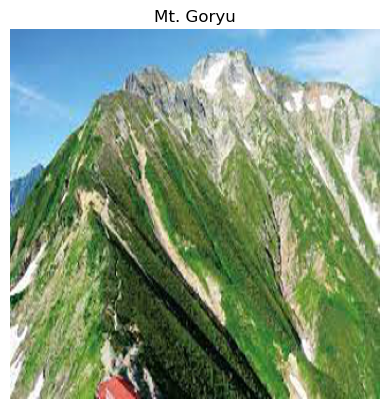

In [35]:
# Load and preprocess the image
img_path = r"C:\Users\dell\Downloads\mountain goryu.jpg"
img = Image.open(img_path).resize(IMAGE_SHAPE)

# Classify the image
predicted_label = classify_image(img, model, label_map)

# Show the image with the predicted label
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(predicted_label)
plt.axis('off')
plt.show()